<a href="https://colab.research.google.com/github/gabitza-tech/ETTI-SummerSchool2025/blob/main/Students_MachineLearning_Intro_ImbalancedClasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Imbalanced Dataset Example - Binary Classification

In the real world, data is rarely **clean** or **perfectly balanced**.  
Some of the common challenges we face include:  

- ⚖️ **Imbalanced classes** — certain outcomes are much rarer than others.  
- ❓ **Missing values** — incomplete information across different attributes.  
- 🌍 **Domain shifts** — differences between training and test data distributions.  

---
To illustrate how to handle imbalanced data in Python, let’s explore the **Bank Marketing Dataset**. This publicly available dataset contains information about bank customers, with the target variable indicating whether a client subscribed to a term deposit after receiving a marketing call (“yes” vs. “no”).

In [42]:
# We need to install this library in order to fetch the dataset we need
!pip install ucimlrepo

In [43]:
# This dataset has a similar format in the end to the previous one from scikit-learn.
from ucimlrepo import fetch_ucirepo
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

# Separate the target labels from the rest of the features
x = bank_marketing.data.features
y = bank_marketing.data.targets

# Show some dataset metadata
print(bank_marketing.metadata)
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# Exercise 1

### Tasks
1. Check dataset size.
2. Check number of features.
3. Check number of classes.
4. Check class distribution.
5. Check for missing data.


In [26]:
# CODE HERE

# Shape of data and number of features
print(x.shape)
print(y.shape)
# Number of classes
print(y.nunique())
# Class Distribution
print(y.value_counts())
# Check for missing data
print(x.isna().sum() )  # sau x.isna().sum().sum() for total missing values



(45211, 16)
(45211, 1)
y    2
dtype: int64
y  
no     39922
yes     5289
Name: count, dtype: int64
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


# Exercise 2

For most of these tasks, look at the previous exercise!

### Tasks:

1. Handle missing features. (can we simply drop samples?)
2. Preprocess features categorical to numerical. - Hint: use `OneHotEncoder` or `LabelEncoder`;
3. Split dataset in train and test sets. (70-30 split)
4. Scale your data. - Whatever scaler you want
4. Train a logistic regression model.
5. How long does training take?
5. Check accuracy.
6. Check precision, recall and f1-score.

In [ ]:
# CODE HERE FOR MISSING DATA + FEATURE & LABEL ENCODING
# import necessary libraries for Encoding Features and Labels
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Numerically encode features based on the number of unique values
le = LabelEncoder()

# Separate categorical and numeric columns
cat_cols = x.select_dtypes(include=["object", "category"]).columns
num_cols = x.select_dtypes(include=["int64", "float64"]).columns

print(cat_cols)
print(num_cols)
# 1. Label Encoder - Individual numerical values for each categorical value in a feature
x_encoded = x.copy()
for col in cat_cols:
  x_encoded[col] = le.fit_transform(x[col])

# x_encoded has the same structure as x, but with categorical columns having numerical values now
x_encoded.head()

print("data_type_x_encoded",x_encoded.dtypes)
# For labels, we can simply transform them in numerical values in the case of binary classification
y_encoded = le.fit_transform(y)
print(set(y_encoded))

# Save encoded features and labels in variables x_encoded and y_encoded
print(x_encoded[:2])
print(set(y_encoded))

from sklearn.model_selection import train_test_split
import numpy as np

# Complete the function - search it
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.3,train_size=0.7, stratify=y_encoded, random_state=42)

# CODE HERE - STUDENTS
# No samples

# See if train-test balanced
print("Train samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0]) 
print("Test samples:", x_encoded) 
print("Procent_sample_pierdute:" ,((y_train.shape[0]/y_encoded.shape[0] * 100),"%"))
print("Procent_sample_pierdute:" ,((y_test.shape[0]/y_encoded.shape[0] * 100),"%"))

print("Train samples:", y_train.shape[0])
print("Test samples:", y_test.shape[0]) 





Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')
data_type_x_encoded age            int64
job            int64
marital        int64
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day_of_week    int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
dtype: object
{np.int64(0), np.int64(1)}
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  
0            5      8       261         1     -1       

c:\Users\vasid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train samples: 31647
Test samples: 13564
Test samples:        age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971 

In [64]:
# CODE HERE FOR TRAINING a Logistic Regression Model
# Necessary imports for training model + evaluation metrics like the report, accuracy score, f1-score
# --- Train Logistic Regression StandardScaler---
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(x_train)
X_test_std = scaler_std.transform(x_test)


clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_std, y_train)

# --- Make predictions ---# 
y_pred = clf.predict(X_test_std)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))


from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# --- Make predictions ---# 
y_pred = clf.predict(X_test_std)

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("accuracy:", acc)
print("f1", f1)
print("precision:", precision)
print("recall:", recall)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.60      0.22      0.32      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.60      0.22      0.32      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564

accuracy: 0.8911825420230021
f1 0.6297148396865174
precision: 0.7501030483559148
recall: 0.5989269287874223


# Let's plot a confusion matrix

Using a combination of scikit-learn, seaborn and matplotlib. Let's first show you how you can do that.

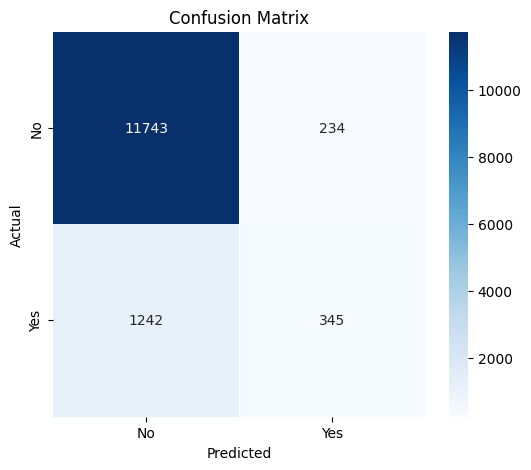

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix( y_pred= y_pred, y_true= y_test) # YOU HAVE TO FILL THIS PART ;)

# Plot using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Dataset Imbalance Techniques


# 1. Random Undersampling

Taking in consideration that one class has a **majority**, what we can do as a very simple technique is to simply **remove randomly** from that class until we obtain an equal number of samples in both classes. - we are **REMOVING** training data on purpose, in order to avoid **OVERFITTING** the majority class.

# Exercise 3

### Tasks

1. What is the new number of samples for each class?
2. How much data did we remove?
3. Train a new logistic regression model - save predictions in `y_pred_rus`
4. How long does training take?
4. Evaluate the model with the new data.

(45211, 16)
(45211, 1)


c:\Users\vasid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 7000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=7000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vasid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


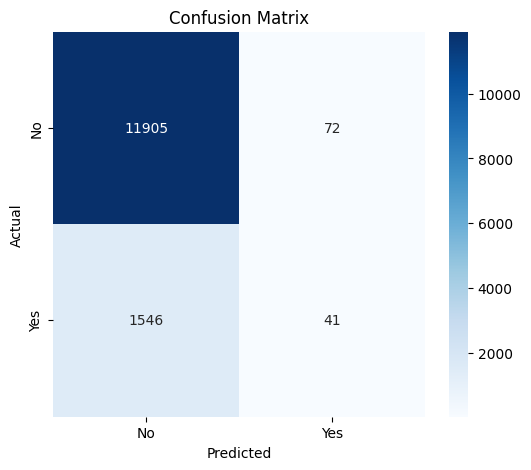

In [77]:
from imblearn.under_sampling import RandomUnderSampler

# 1️⃣ Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(x_train, y_train) # New data
print(x.shape)
print(y.shape)

# Train a logistic regression model with the new data - save your predictions in y_pred_rus
rus_model = LogisticRegression(max_iter=7000)
rus_model.fit(X_rus, y_rus)

y_pred_rus = rus_model.predict(X_test_std)
# --- IGNORE ---    
# Evaluate the new model, save f1_rus, acc_rus

f1 = f1_score(y_test, y_pred_rus, average='macro')


# Compute confusion matrix
cm = confusion_matrix( y_pred= y_pred_rus, y_true= y_test) # YOU HAVE TO FILL THIS PART ;)

# Plot using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 2. Random Oversampling

Taking in consideration that one class has a **minority**, what we can do as a very simple technique is to simply **randomly repeat** samples from that class until we obtain an equal number of samples in both classes. - we are **ADDING** training data on purpose, in order to avoid **UNDERFITTING** the minority class.

# Exercise 4

### Tasks

1. What is the new number of samples for each class?
3. Train a new logistic regression model - save predictions in `y_pred_ros`
4. How long does training take?
4. Evaluate the model with the new data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler


# 1️⃣ Random Undersampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(x_train, y_train)

# Write your training code here - save your predictions in y_pred_ros
# ...
y_pred_ros = ...

# Evaluate your model, save f1_ros, acc_ros for later comparisons
f1_ros = ... # calculate macro

# 3. Train the Logistic Regression Model with the class balancing function

Most methods nowadays have a parameter that can put a bigger weight/importance on minority classes, in order to give them equal importance to the more presents clases. This is a simple method and it only need to add the `class_output='balanced'` in the initialization of the `LogisticRegression` function.

# Exercise 5

### Tasks

1. What is the number of samples for each class?
3. Train a new logistic regression model - save predictions in `y_pred_bal`
4. How long does training take?
4. Evaluate the model with the new data.

In [ ]:
# CODE HERE
# Balanced Logistic Regression Model training
clf_bal = LogisticRegression(max_iter=500, class_weight='balanced')
...

# Predict and evaluate, save your predictions in y_pred_bal
y_pred_bal = ...

# Evaluate your model here, save f1_bal, acc_bal
...


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     11977
           1       0.42      0.81      0.55      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.83      0.73     13564
weighted avg       0.91      0.85      0.87     13564

Accuracy: 0.8464317310527868


# Data Imbalance Techniques comparison

Let's plot some confusion matrices for each case, side-by-side. You have minimal *code filling* to do.

# Exercise 6

### Tasks

1. What is the best method?
2. Also print some info about each methods f1-score, acc, time taken, etc.

### OPTIONAL
3. Plot a graph containing the AUROC curve for all 4 cases (unbalanced, undersampling, oversampling, balanced). Make the curves of different colors, with an associated legend. Search what you need in order to plot such a curve, you can obtain auroc/precision/recall values easily with `sklearn.metrics`.

In [ ]:
# Prepare data - fill the necessary variables
preds = {
    'Original Logistic': ...,
    'Balanced Class Weight': ...,
    'Random Undersampling': ...,
    'Random Oversampling': ...
}

# Create 1 row, 4 columns plot
fig, axes = plt.subplots(1, 4, figsize=(20,5))

for ax, (title, pred) in zip(axes, preds.items()):
    cm = confusion_matrix(...) # FILL THE NECESSARY VARIABLES
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# CODE HERE
# Print some more info about each methods performance, acc, f1-score, etc.
...

In [ ]:
# CODE HERE
# PLOT A GRAPHIC CONTAINING ALL 4 AUROC CURVES
...